# Проект: Принятие решений в бизнесе

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

###  Загрузка и подготовка данных к анализу

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
import scipy.stats as stats
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.3f}".format)

Описание данных

Файл /datasets/hypothesis.csv. Скачать датасет
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

А\В тест проводился в период 01.08.2019 - 01.09.2019

In [2]:
# Загрузка данных
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
with pd.option_context('display.max_colwidth', 200,):
    print(hypothesis['Hypothesis'])

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

In [5]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# Проверка пропусков и типов данных
print(hypothesis.isnull().sum())
print()
print(hypothesis.dtypes)
print("\n")
print(orders.isnull().sum())
print()
print(orders.dtypes)
print("\n")
print(visitors.isnull().sum())
print()
print(visitors.dtypes)

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Efforts        int64
dtype: object


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object


date        0
group       0
visitors    0
dtype: int64

date        object
group       object
visitors     int64
dtype: object


In [8]:
# Проверка дубликатов
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


Данные впорядке, пропусков и дубликатов нет, можно приступать к дальнейшей работе.

# Этап 1: Приоритизация гипотез

In [9]:
# Приоритизация с помощью фреймворка ICE
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence']/hypothesis['Efforts']

print(hypothesis[[ 'Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день... 16.200
0  Добавить два новых канала привлечения трафика,... 13.333
7  Добавить форму подписки на все основные страни... 11.200
6  Показать на главной странице баннеры с актуаль...  8.000
2  Добавить блоки рекомендаций товаров на сайт ин...  7.000
1  Запустить собственную службу доставки, что сок...  2.000
5  Добавить страницу отзывов клиентов о магазине,...  1.333
3  Изменить структура категорий, что увеличит кон...  1.125
4  Изменить цвет фона главной страницы, чтобы уве...  1.000


Вывод: Наиболее перспективные гипотезы по ICE: 8, 0, 7. 

In [10]:
# Приоритизация с помощью фреймворка RICE
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

print(hypothesis[[ 'Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis    RICE
7  Добавить форму подписки на все основные страни... 112.000
2  Добавить блоки рекомендаций товаров на сайт ин...  56.000
0  Добавить два новых канала привлечения трафика,...  40.000
6  Показать на главной странице баннеры с актуаль...  40.000
8  Запустить акцию, дающую скидку на товар в день...  16.200
3  Изменить структура категорий, что увеличит кон...   9.000
1  Запустить собственную службу доставки, что сок...   4.000
5  Добавить страницу отзывов клиентов о магазине,...   4.000
4  Изменить цвет фона главной страницы, чтобы уве...   3.000


Вывод: Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6. 

Перспективные гипотизы 7, 0 сопадают при приоритизации по обоим методом. Когда мы применяем методику RICE, на первый план выходит форма для сбора базы ( гипотиза 7) так как она затронет большее количество людей.

Фреймворк ICE (Impact, Confidence, Effort) позволяет оценить гипотезы, учитывая их потенциальное влияние, уверенность в успехе и затраты ресурсов.

Фреймворк RICE (Reach, Impact, Confidence, Effort) добавляет к сравнению охват (Reach), что позволяет учитывать масштаб потенциального влияния гипотезы. 

При использовании фреймворка RICE приоритет гипотез изменился главным образом за счет учета охвата. Гипотезы, которые оказывают влияние на более широкую аудиторию, поднялись в списке приоритета выше. Например, предложение "Добавить форму подписки", которое охватывает большую часть пользователей, взлетело на первое место. В то время как гипотеза "Запустить акцию на день рождения", хоть и сохраняет высокие баллы по остальным параметрам, оказалась ниже из-за малого охвата. Это демонстрирует важность охвата в оценке влияния гипотез на весь бизнес.

# Этап 2: Анализ A/B-теста

## Стабильность кумулятивных метрик

In [11]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y/%m/%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y/%m/%d')
                                  
print(orders.head(5))
print(visitors.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [12]:
# Стабильность кумулятивных метрик, подготовка данных

datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


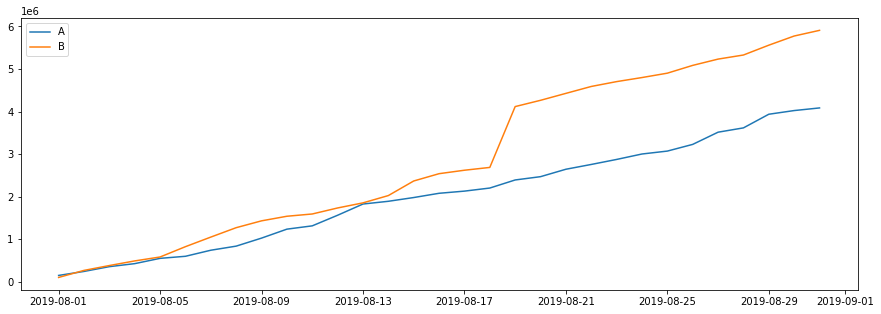

In [13]:
# графики кумулятивной выручки по дням по группам.
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

В середине теста сегмент B еще больше вырвался вперёд и продолжал лидировать весь остаток теста. Возможно, что аномально большие заказы всё-таки влияют на результаты. При заключительном анализе их нужно удалить

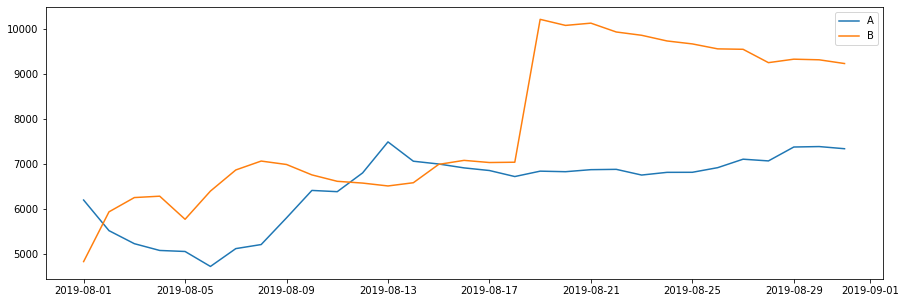

In [14]:
# графики кумулятивного среднего чека по дням.
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 


По центральной предельной теореме значение кумулятивных метрик часто сходится и устанавливается около некоторого среднего. Сейчас данные колебаются, и есть резкие всплески, нужно исследовать дальше

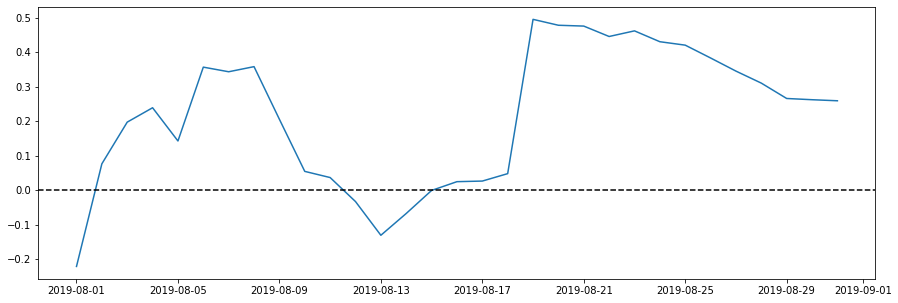

In [15]:
# График относительно различия кумулятивного среднего чека группы B к группе A. 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

Значения выше 0 указывают, что средний чек в группе B выше, чем в группе A, и наоборот. Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

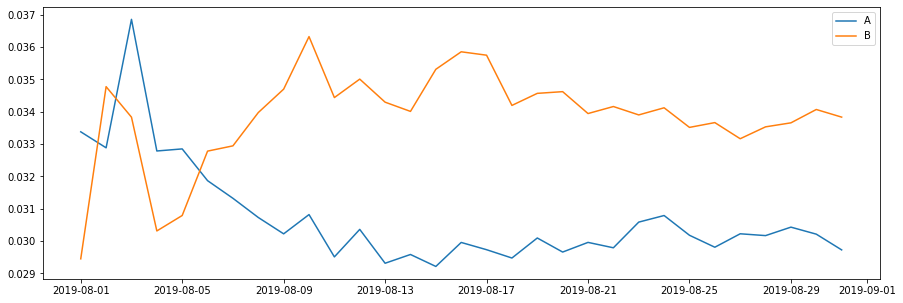

In [16]:
# График кумулятивного среднего количества заказов на посетителя по группам и по дням.

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


Абсолютное значение колебания в начале и в конце теста: от 29% до 37%. К концу теста колебания остановились, и среднее количество заказов по группам установилось около своего среднего значения.

/tmp/ipykernel_78/121062134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulativeDataA['date'] = pd.to_datetime(cumulativeDataA['date'])
/tmp/ipykernel_78/121062134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulativeDataB['date'] = pd.to_datetime(cumulativeDataB['date'])


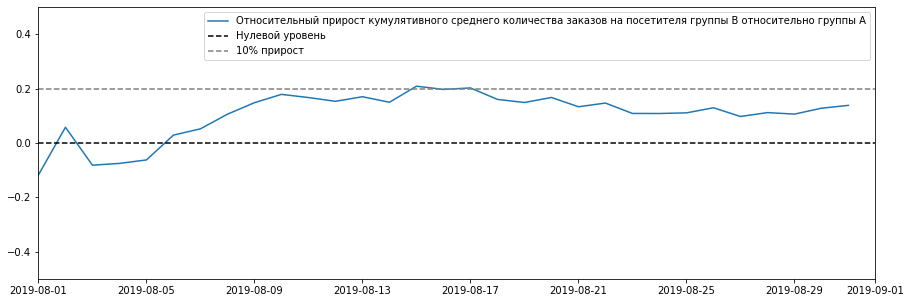

In [17]:
# График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

cumulativeDataA['date'] = pd.to_datetime(cumulativeDataA['date'])
cumulativeDataB['date'] = pd.to_datetime(cumulativeDataB['date'])

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 

mergedCumulativeConversions['date'] = pd.to_datetime(mergedCumulativeConversions['date'])

plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")


start_date = dt.strptime('2019-08-01', '%Y-%m-%d')
end_date = dt.strptime('2019-09-01', '%Y-%m-%d')
plt.axhline(y=0, color='black', linestyle='--', label='Нулевой уровень')
plt.axhline(y=0.2, color='grey', linestyle='--', label='10% прирост')
plt.axis([start_date, end_date, -0.5, 0.5])
plt.legend()
plt.show()

В начале группа A в среднем имела больше заказов на посетителя, чем группа B. Далее график резко поднимается, падает, и снова выростает, после чего линия стабилизируется, оставаясь выше уровня 0. Это говорит о том, что в конце исследуемого периода группа B сохранила превосходство в количестве заказов на посетителя.

## Анализ выбросов и всплесков: крайние значения данных

In [18]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by = 'orders', ascending = False).head(20))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
393   1614305549       4
114    457167155       4
619   2587333274       4
340   1404934699       3
937   3908431265       3
726   2988190573       3
97     393266494       3
491   2044997962       3
677   2780786433       3
932   3891541246       3


Есть пользователи, которые совершили 3 и больше заказов, пока не понятно сколько их, исследуем дальше.

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

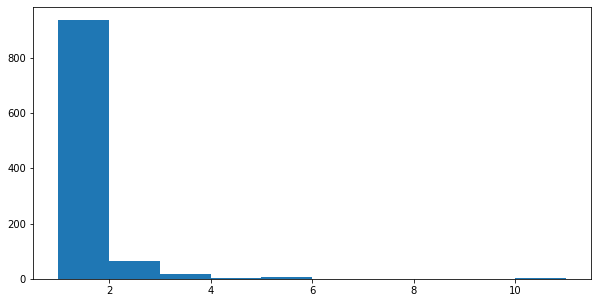

In [19]:
# Гистограмма распределения числа заказов по пользователям методом hist().

plt.figure(figsize=(10, 5))
plt.hist(ordersByUsers['orders'])

На графике что в основном пользователи делают 1-2 заказа. Посмотрим подробнее сколько пользователей совершают больше

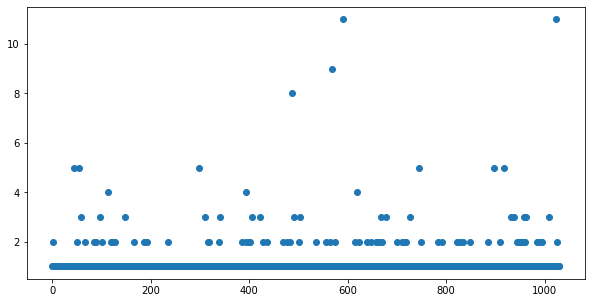

In [20]:
# Диаграмма

plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 


Видим что больше 2-х закахов сделали не так много человек, и есть несколько заказов больше 8. Это может делать тест некоректным.

In [21]:
# Считайте 90-й, 95-й и 99-й выборочные перцентили количества заказов по пользователям
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше четырех заказов.

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <BarContainer object of 10 artists>)

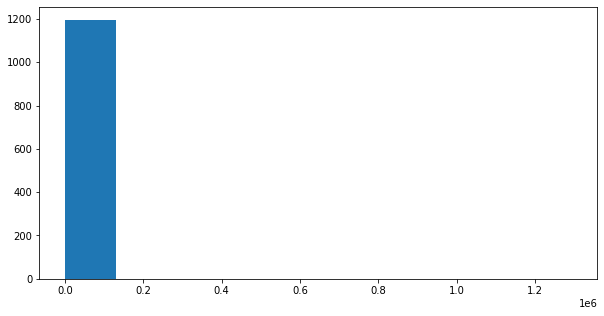

In [22]:
# Подсчитаем количество заказов по пользователям и посмотрим на результат 
# Строим гистограмму распределения выручек ('revenue') с заказов по пользователям 
plt.figure(figsize=(10, 5))
plt.hist(orders['revenue']) 

Сумма большинства заказов меньше 200 000 рублей. Однако по гистограмме ничего не сказать о более дорогих, как и распределении более дешёвых. 

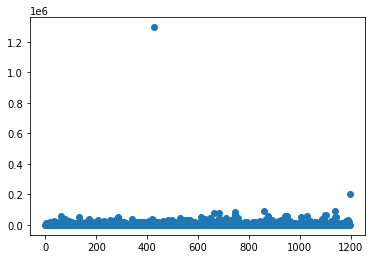

In [23]:
# Гистограмма распределения выручек ('revenue') с заказов по пользователям
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Есть два анамальных заказа 200 000 и 1300 000 

In [24]:
# Cчитаtv 90-й, 95-й и 99-й выборочные перцентили выручки с заказов по пользователям.
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более, чем у 5% заказов чек дороже 28000 рублей. И не больше, чем у 1% заказов — дороже 58233 рублей

Оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы;
Увидели выбросы и нашли границу для их определения.
Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [26]:
# Cчитаем статистическую значимость различия в среднем количестве заказов между группами.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
     
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-значения:{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное изменение средних значений между группой B и А: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значения:0.017
Относительное изменение средних значений между группой B и А: 0.138


Согласно полученному p-значению, равному 0.017, которое меньше уровня значимости 0.05, мы можем отклонить нулевую гипотезу. Это свидетельствует о наличии статистически значимого различия в среднем количестве заказов между группами A и B.

Средние число заказов группы B примерно на 13.8% больше, чем среднее значение группы A.

Проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [27]:
print('p-значения: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия в среднем чеке между группами:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


p-значения: 0.729
Относительные различия в среднем чеке между группами:0.259


P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Средний чек группы B примерно на 25,9% выше среднего чека группы A.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

Узнаем, сколько всего аномальных пользователей

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-значения:{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное изменение среднего количества заказов между группой B и А: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-значения:0.013
Относительное изменение среднего количества заказов между группой B и А: 0.173


P-value принял значение 0.013, что меньше порога значимости 0.05, нулевую гипотизу можно отвергнуть. 
Результаты по среднему количеству заказов стали меньше на 5% (с 0.173 на 0.138). 

С сырыми данными:    
p-значения:0.017
Относительное изменение средних значений между группой B и А: 0.138

In [30]:
print(
    'p-значения: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительные различия в среднем чеке между группами: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 



p-значения: 0.738
Относительные различия в среднем чеке между группами: -0.020


P-value принял значение 0.738, превышающее порог значимости 0.05. Это свидетельствует о том, что у нас нет достаточных оснований для отклонения нулевой гипотезы относительно среднего чека. Так же стоит отметить, что по сранению с данными до удаление выброс.

При этом относительные различия показывают, что средний чек группы B был бы на 25.9% выше среднего чека группы A, после очистки данных,средний чек группы B примерно на 2% ниже среднего чека группы A.

Результаты ранее:
p-значения: 0.729
Относительные различия в среднем чеке между группами:0.259



УДАЛИЛА БЫ, не тот вывод. Какие выводы по тесту можем сделать?
Имеющиеся факты:
- Есть статистически значимого различия по среднему количеству заказов между группами по «сырым», ни по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B хуже группы A и нет значительной тенденции к улучшению:

На основании предоставленных данных можно сделать следующий вывод о целесообразности продолжения A/B-теста с целью увеличения выручки:

Результаты A/B-теста\
- Среднее количество заказов:
Статистическая значимость: p-значение 0.017 (< 0.05) указывает на наличие статистически значимого различия между группами A и B.
Изменение: В группе B среднее количество заказов на пользователя увеличилось на 13.8% (после обработки данных - на 17.3%), что является положительным знаком для бизнеса.
- Средний чек:
Статистическая значимость: p-значение 0.729 и 0.738 (до и после очистки данных соответственно) говорит о том, что различия в среднем чеке не являются статистически значимыми.
Изменение: Средний чек группы B оказался на 20% ниже, чем в группе A, что может негативно сказаться на общей выручке, даже несмотря на рост количества заказов.

Вывод


Необходимо продолжить тест, так как:

- Рост среднего количества заказов: Значительное увеличение среднего количества заказов на пользователя в группе B на 13.8% (и до 17.3% после удаления аномалий) может компенсировать падение среднего чека, особенно если это увеличение устойчиво и не временно. Это означает, что изменения, внедренные в группу B, способны привлечь больше покупателей или мотивировать их к совершению дополнительных покупок.
- Гибкость стратегии: Существующее снижение среднего чека можно рассматривать как возможность для дальнейших исследований. Например, дополнительные тесты и анализ можно провести для выяснения причин, по которым средний чек низок. Это может потребовать новых подходов к ценообразованию, акций и скидок или улучшения асортимента товаров.

P.s. Я бы параллельно с количеством заказов и средним чеком, проанализировала другие параметры, такие как конверсия сайта, стоимость привлечения клиента и удержание клиентов. Это бы дало более полную картину.

На основании предоставленных данных можно сделать следующий вывод о целесообразности продолжения A/B-теста с целью увеличения выручки:

Результаты A/B-теста\
- Среднее количество заказов:
Статистическая значимость: p-значение 0.017 (< 0.05) указывает на наличие статистически значимого различия между группами A и B.
Изменение: В группе B среднее количество заказов на пользователя увеличилось на 13.8% (после обработки данных - на 17.3%), что является положительным знаком для бизнеса.
- Средний чек:
Статистическая значимость: p-значение 0.729 и 0.738 (до и после очистки данных соответственно) говорит о том, что различия в среднем чеке не являются статистически значимыми.
Изменение: Относительное изменение среднего чека между группами стало отрицательным, но незначительным (-2%), что также не позволяет сделать вывод о различиях.

Результаты теста показывают, что группа B демонстрирует статистически значимое увеличение среднего количества заказов по сравнению с группой A, и этот эффект усиливается после удаления аномалий. Однако, различий в среднем чеке между группами не выявлено, что указывает на отсутствие значимого влияния изменений на средний чек.

Таким образом, тест можно считать успешным по критерию количества заказов — группа B показывает положительный эффект, и это обоснованно завершить тест и признать успешным.
